About Dataset

"Superstore Sales" generally refers to the sales data and performance of a superstore or a large retail store that offers a wide range of products and merchandise. These superstores are typically known for their extensive inventory, competitive pricing, and one-stop shopping experience.


Analyzing superstore sales data is essential for store owners, managers, and analysts to understand the store's performance, identify trends, and make informed business decisions. Here are some key aspects of superstore sales analysis:


Sales Revenue: Tracking the total sales revenue over time provides insights into the overall financial performance of the superstore. It helps identify peak seasons and periods of high or low sales.


Sales by Product Category: Analyzing sales by product category (e.g., electronics, apparel, home goods) helps understand which categories are driving revenue and which may require improvement.


Sales by Region: Superstores often have multiple locations. Analyzing sales by region helps identify the best-performing stores and areas for expansion or improvement.


Sales by Customer Segments: Understanding sales patterns among different customer segments can inform targeted marketing strategies and customer engagement.


Sales Trends: Identifying sales trends over time, such as monthly or seasonal variations, can help in inventory management and marketing planning.


Product Performance: Analyzing individual product sales can help identify popular products, slow-moving items, and potential stockouts.


Customer Behavior: Studying customer behavior, such as purchase frequency, average transaction value, and repeat purchases, provides insights into customer preferences and loyalty.


Promotions and Discounts: Evaluating the impact of promotions and discounts on sales can help optimize marketing strategies.


Sales Forecasting: Using historical sales data, superstore owners and managers can forecast future sales, plan inventory levels, and make data-driven decisions.


To conduct thorough sales analysis, superstores often use data visualization tools, spreadsheets, or specialized retail analytics software. These tools help present the data in a visually appealing and easy-to-understand format, enabling better decision-making and strategic planning. Additionally, by integrating sales data with other metrics like profitability, inventory turnover, and customer satisfaction, superstore owners can gain a comprehensive view of their business performance.

IMPORT DATA

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer


UNZIP FILE

In [2]:
#UNZIP FILE
#zip = ZipFile('D:\\vscode\\Superstore_sales_analysis\\Superstore-Sales-Analysis\\superstore_final_dataset (1).csv.zip')
#zip.extractall()

Import the data

In [3]:
df=pd.read_csv('D:\\vscode\\Superstore_sales_analysis\\Superstore-Sales-Analysis\\superstore_final_dataset (1).csv',encoding= 'unicode_escape')

HEAD

In [4]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


Print basic Information 

In [5]:
class info():
    def __init__(self):
        self.df=df
    def info_(self):
        info__=df.info()
        return info__
    def is_null_sum(self):
        null_sum=df.isnull().sum()/100,("%")
        print("-----------------------------------")
        return null_sum
    def des_cribe(self):
        des=df.describe()
        print("-----------------------------------")
        return des
    def uni_que(self):
        uniquee=df.unique()
df1=info()
print(df1.info_())
print(df1.is_null_sum())
print(df1.des_cribe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Print Unique in each columns

In [6]:
for i in df.columns:
    print(i,"------------>",df[i].unique())

Row_ID ------------> [   1    2    3 ... 9798 9799 9800]
Order_ID ------------> ['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']
Order_Date ------------> ['8/11/2017' '12/6/2017' '11/10/2016' ... '18/06/2015' '28/02/2018'
 '9/5/2016']
Ship_Date ------------> ['11/11/2017' '16/06/2017' '18/10/2016' ... '12/3/2015' '6/4/2018'
 '13/05/2016']
Ship_Mode ------------> ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer_ID ------------> ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775

In [7]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:

df.describe(include='all')

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


Checking Shape

In [9]:
df.shape

(9800, 18)

In [10]:
df['Postal_Code'].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

Checking Null Values

In [11]:
df[df['Postal_Code'].isnull()]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,6/4/2017,10/4/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Drop Null Values

In [12]:
df.dropna(inplace=True)

Convert Date column to Date-Time Format

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [14]:
df['year_order_date'] = df['Order_Date'].dt.year
df['month_order_date'] = df['Order_Date'].dt.month
df['day_of_week_order_date'] = df['Order_Date'].dt.day_of_week
df['day_of_year_order_date'] = df['Order_Date'].dt.day_of_year
df['weekday_date_order_date'] = df['Order_Date'].dt.weekday
df['quarter_order_date'] = df['Order_Date'].dt.quarter


df['year_Ship_Date'] = df['Ship_Date'].dt.year
df['month_Ship_Date'] = df['Ship_Date'].dt.month
df['day_of_week_Ship_Date'] = df['Ship_Date'].dt.day_of_week
df['day_of_year_Ship_Date'] = df['Ship_Date'].dt.day_of_year
df['weekday_date_Ship_Date'] = df['Ship_Date'].dt.weekday
df['quarter_Ship_Date'] = df['Ship_Date'].dt.quarter


View Correlation Matrix Graph

<Axes: >

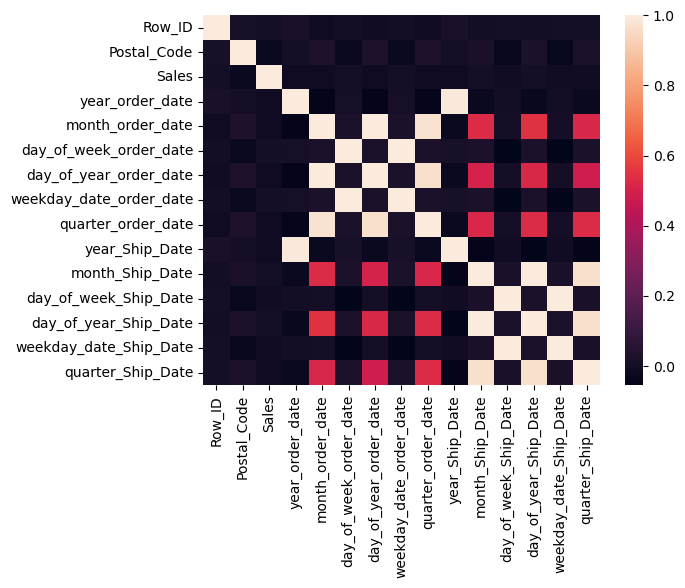

In [15]:
sns.heatmap(data=df.corr())

<Axes: >

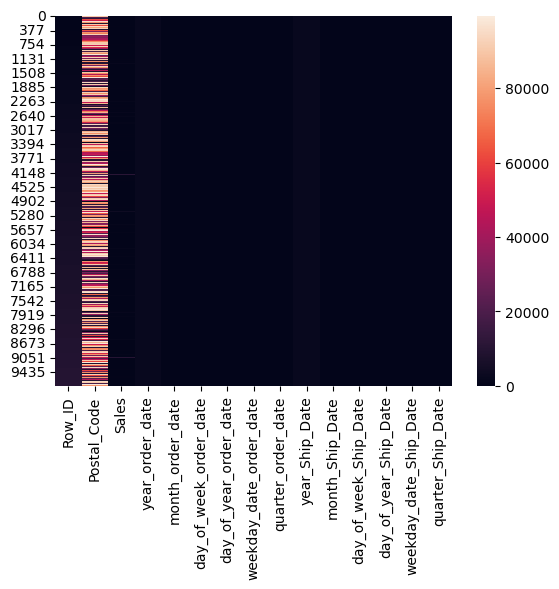

In [16]:
hist=df.select_dtypes(include=np.number)
sns.heatmap(data=hist)

Pair Plot


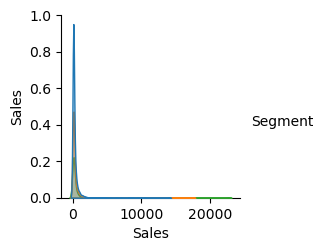

In [17]:
sns.pairplot(data=df,vars=['Sales'],hue='Segment')

BOX_PLOT

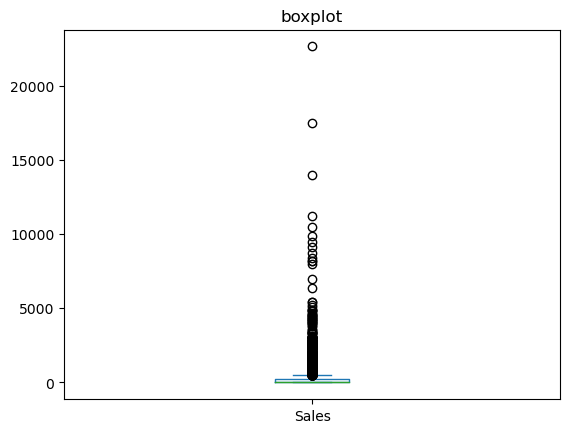

In [18]:
ax = df[['Sales']].plot(kind='box', title='boxplot')

In [19]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'year_order_date', 'month_order_date',
       'day_of_week_order_date', 'day_of_year_order_date',
       'weekday_date_order_date', 'quarter_order_date', 'year_Ship_Date',
       'month_Ship_Date', 'day_of_week_Ship_Date', 'day_of_year_Ship_Date',
       'weekday_date_Ship_Date', 'quarter_Ship_Date'],
      dtype='object')

HISTPLOT

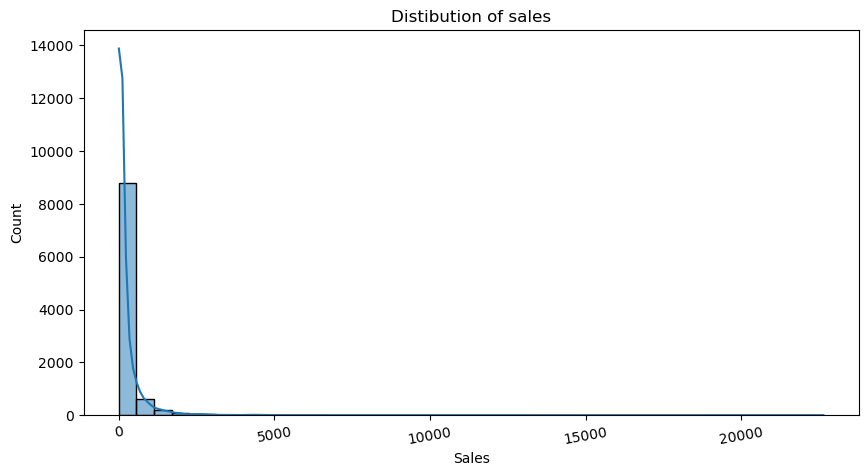

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Sales'],kde=True,bins=40)
plt.title('Distibution of sales')
plt.xticks(rotation=10)
plt.show()

Sales over time

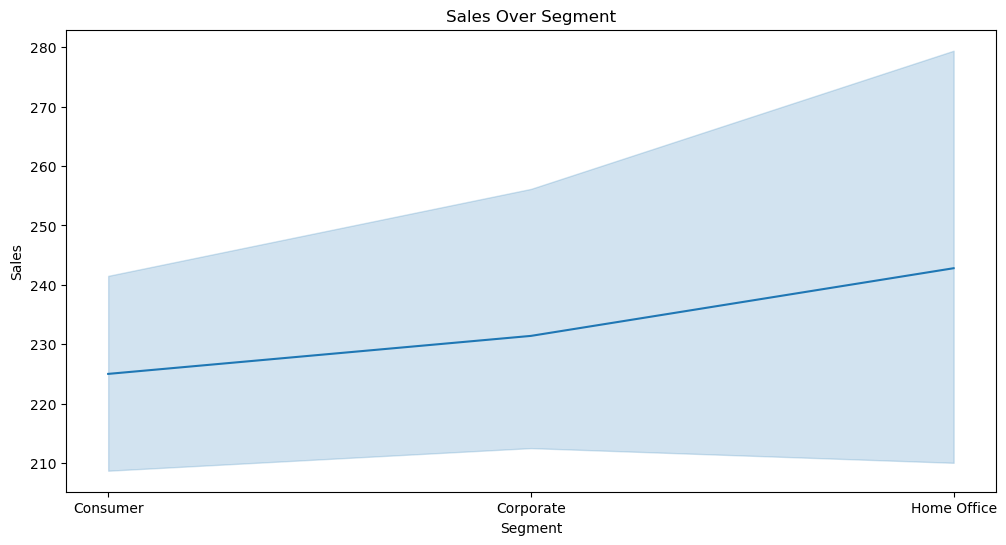

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Segment', y='Sales', data=df)
plt.title("Sales Over Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

Sales-Region

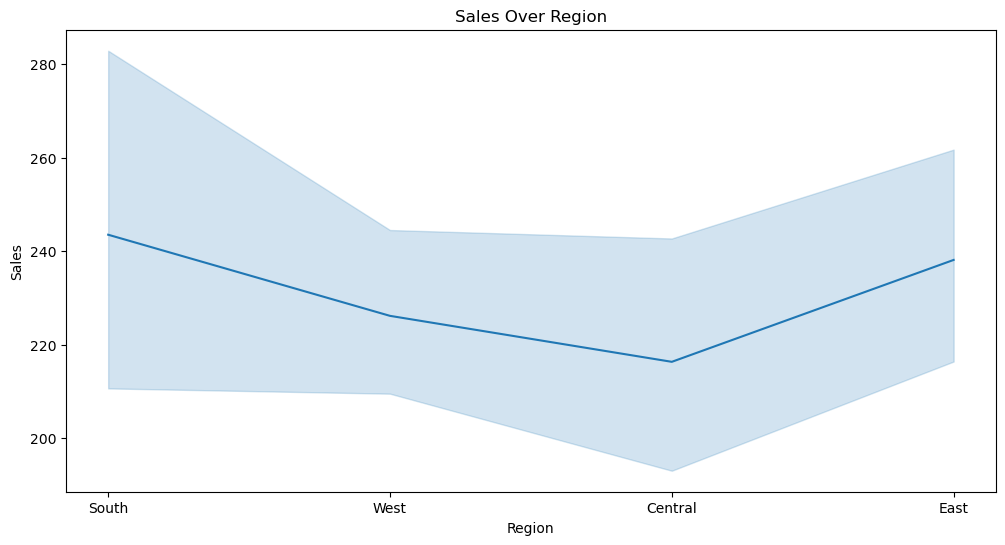

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Region', y='Sales', data=df)
plt.title("Sales Over Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

Sales - Over_Date

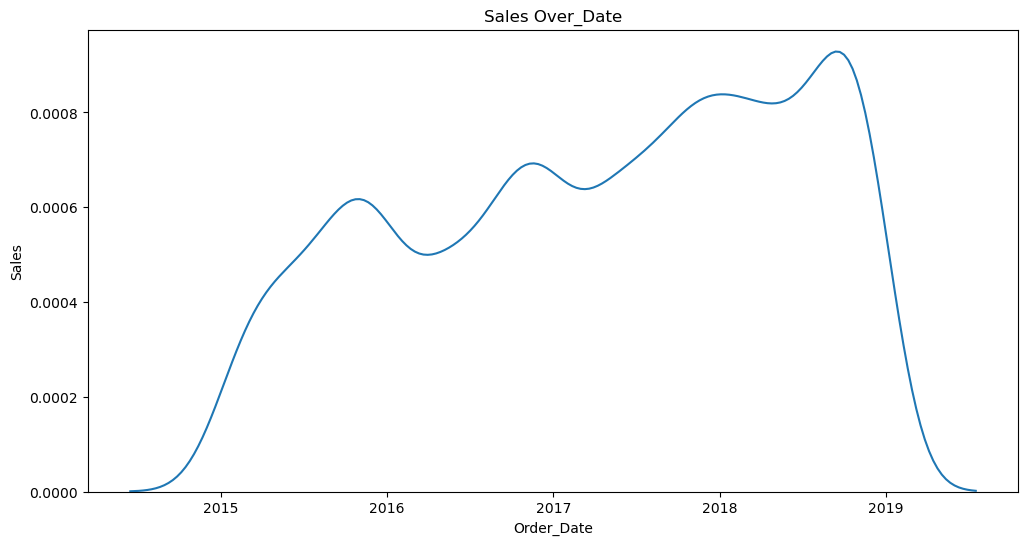

In [23]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Order_Date', data=df)
plt.title("Density of Order_Date")
plt.xlabel("Order_Date")
plt.ylabel("Sales")
plt.show()

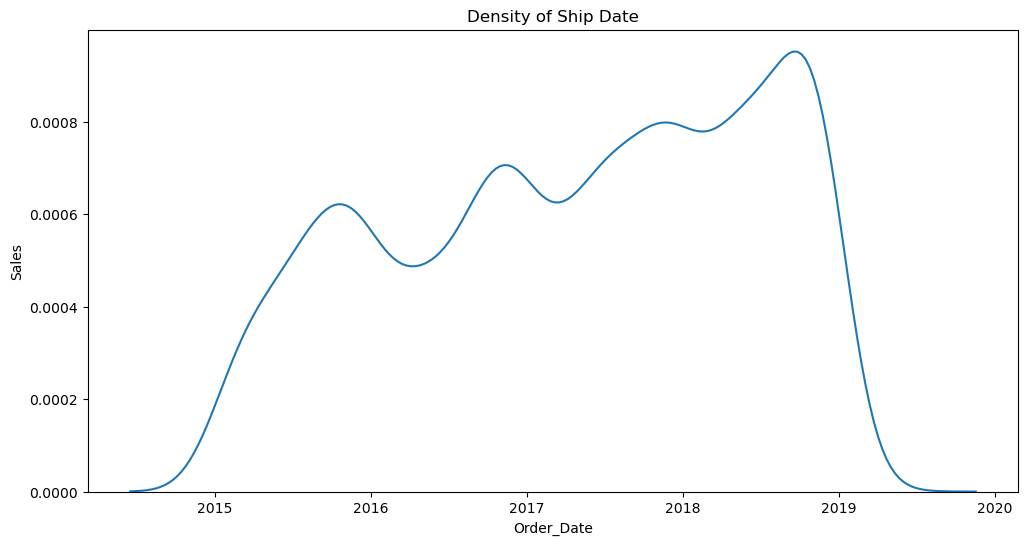

In [76]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Ship_Date', data=df)
plt.title("Density of Ship Date")
plt.xlabel("Order_Date")
plt.ylabel("Sales")
plt.show()

In [25]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'year_order_date', 'month_order_date',
       'day_of_week_order_date', 'day_of_year_order_date',
       'weekday_date_order_date', 'quarter_order_date', 'year_Ship_Date',
       'month_Ship_Date', 'day_of_week_Ship_Date', 'day_of_year_Ship_Date',
       'weekday_date_Ship_Date', 'quarter_Ship_Date'],
      dtype='object')

In [26]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,day_of_week_order_date,day_of_year_order_date,weekday_date_order_date,quarter_order_date,year_Ship_Date,month_Ship_Date,day_of_week_Ship_Date,day_of_year_Ship_Date,weekday_date_Ship_Date,quarter_Ship_Date
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,4,223,4,3,2017,11,5,315,5,4
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,4,223,4,3,2017,11,5,315,5,4
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,340,2,4,2017,6,4,167,4,2
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,3,315,3,4,2016,10,1,292,1,4
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,3,315,3,4,2016,10,1,292,1,4


Sales - Month-Over-Ship-Data

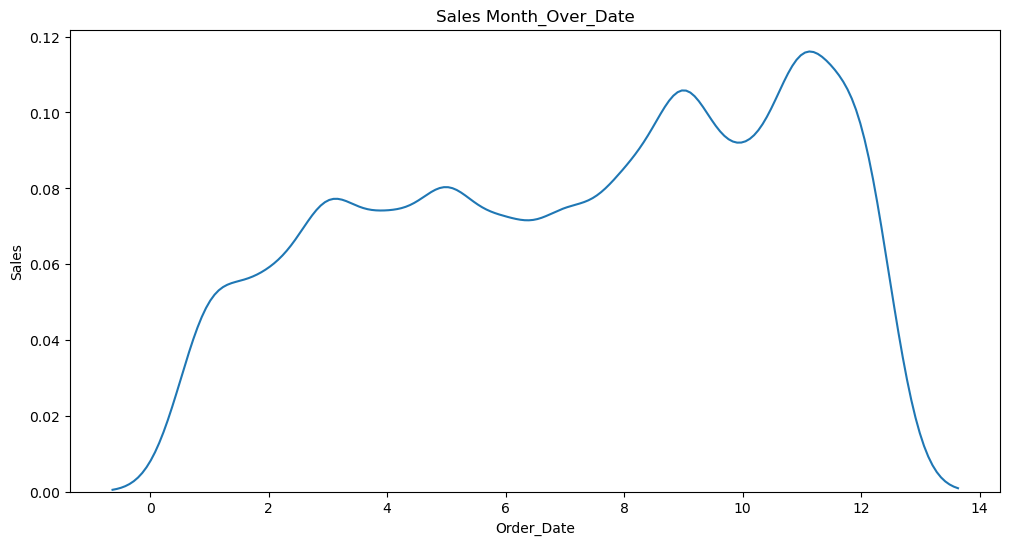

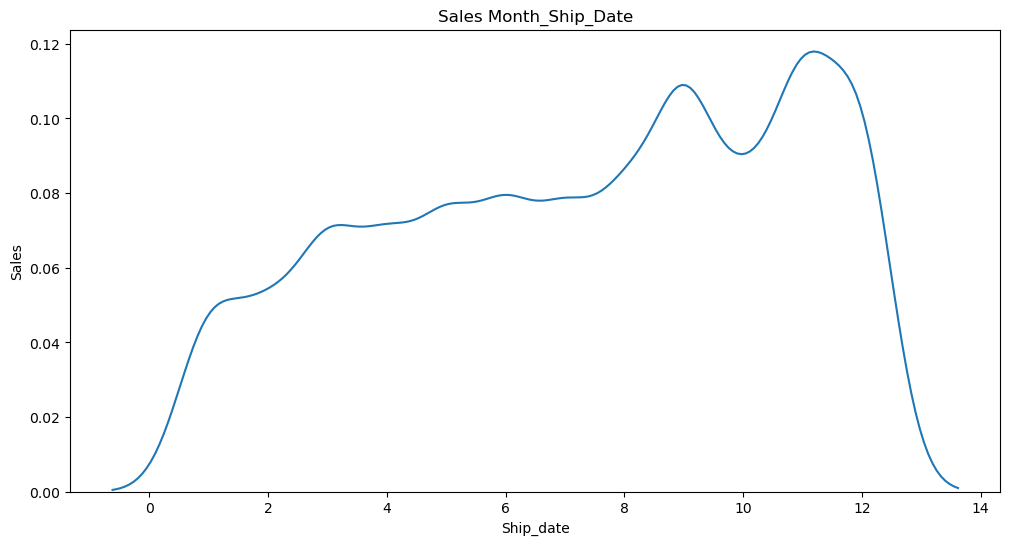

In [27]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='month_order_date', data=df)
plt.title("Sales Month_Over_Date")
plt.xlabel("Order_Date")
plt.ylabel("Sales")
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(x='month_Ship_Date', data=df)
plt.title("Sales Month_Ship_Date")
plt.xlabel("Ship_date")
plt.ylabel("Sales")
plt.show()

Sales - Day_of_week - Order_date - Ship_date

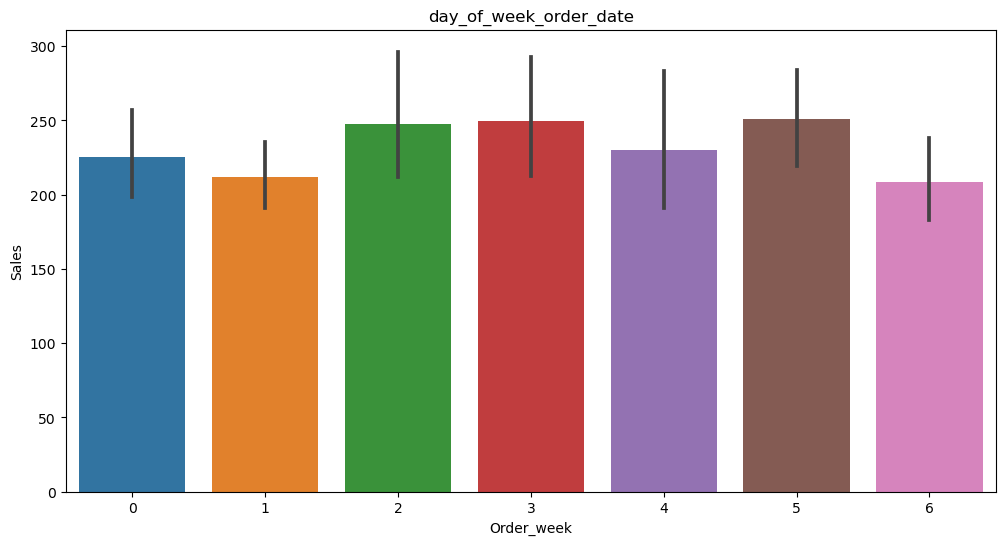

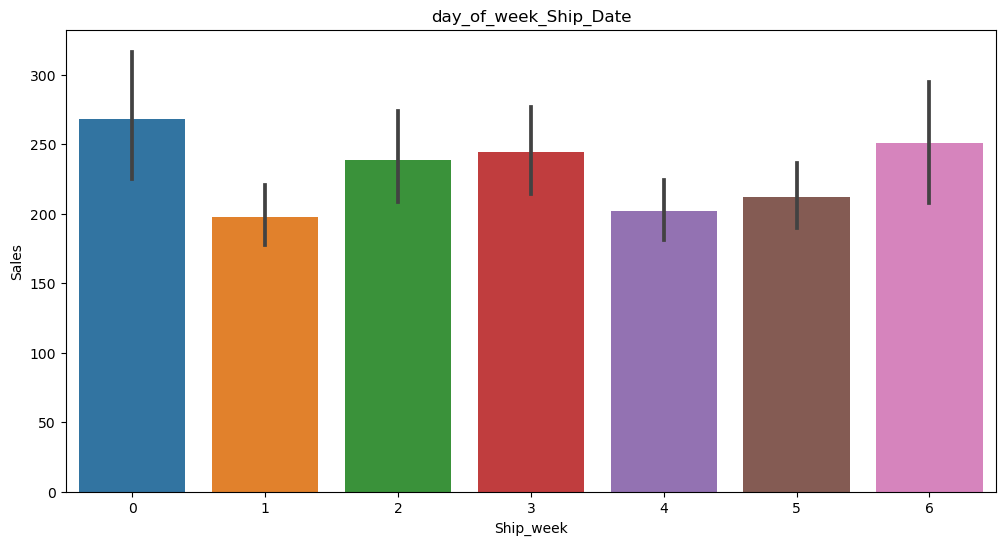

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_order_date',y='Sales', data=df)
plt.title("day_of_week_order_date")
plt.xlabel("Order_week")
plt.ylabel("Sales")
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_Ship_Date',y='Sales', data=df)
plt.title("day_of_week_Ship_Date")
plt.xlabel("Ship_week")
plt.ylabel("Sales")
plt.show()

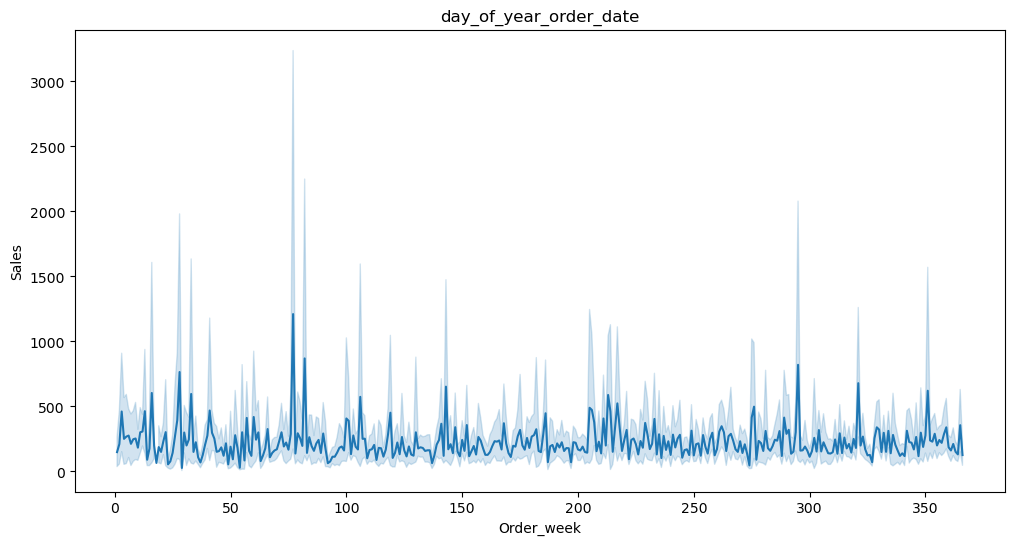

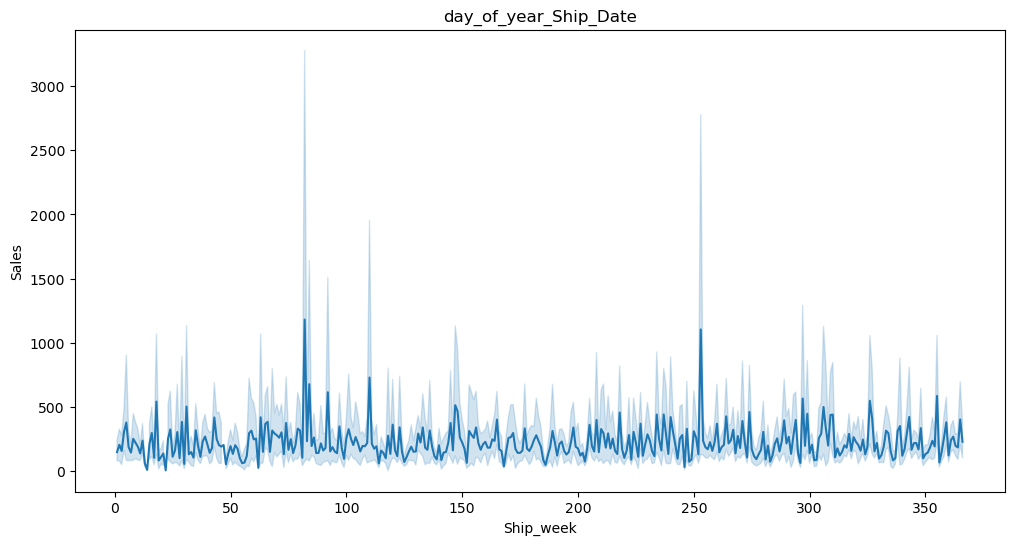

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_year_order_date',y='Sales', data=df)
plt.title("day_of_year_order_date")
plt.xlabel("Order_week")
plt.ylabel("Sales")
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_year_Ship_Date',y='Sales', data=df)
plt.title("day_of_year_Ship_Date")
plt.xlabel("Ship_week")
plt.ylabel("Sales")
plt.show()

Sales - Weekday - Order_date - Ship_date 

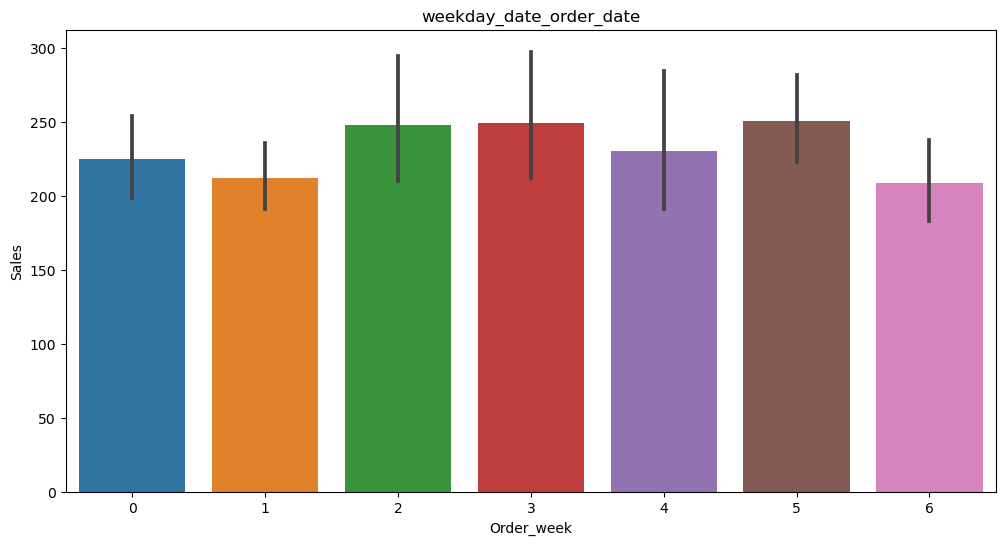

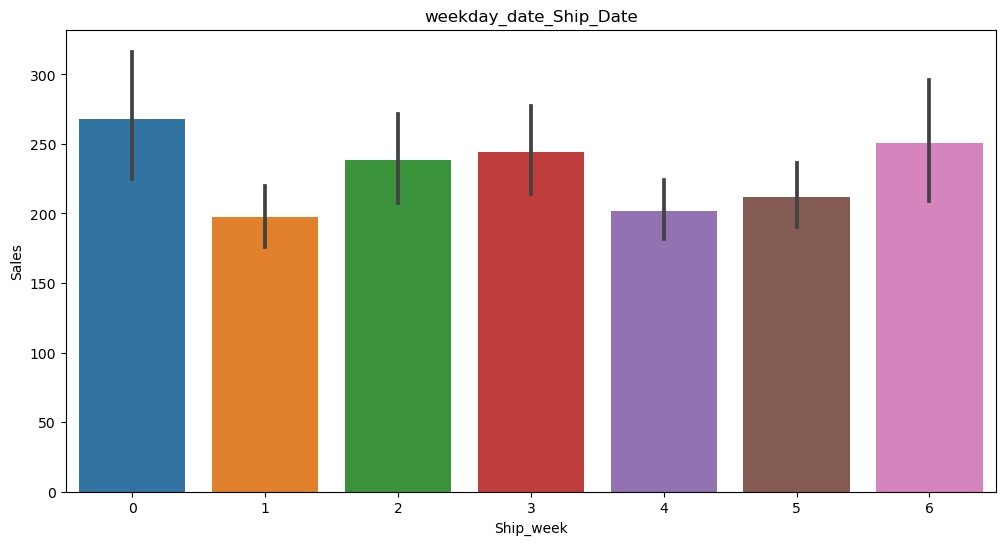

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_date_order_date',y='Sales', data=df)
plt.title("weekday_date_order_date")
plt.xlabel("Order_week")
plt.ylabel("Sales")
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_date_Ship_Date',y='Sales', data=df)
plt.title("weekday_date_Ship_Date")
plt.xlabel("Ship_week")
plt.ylabel("Sales")
plt.show()

Sales - Quater_order - Oder_date - Ship_date

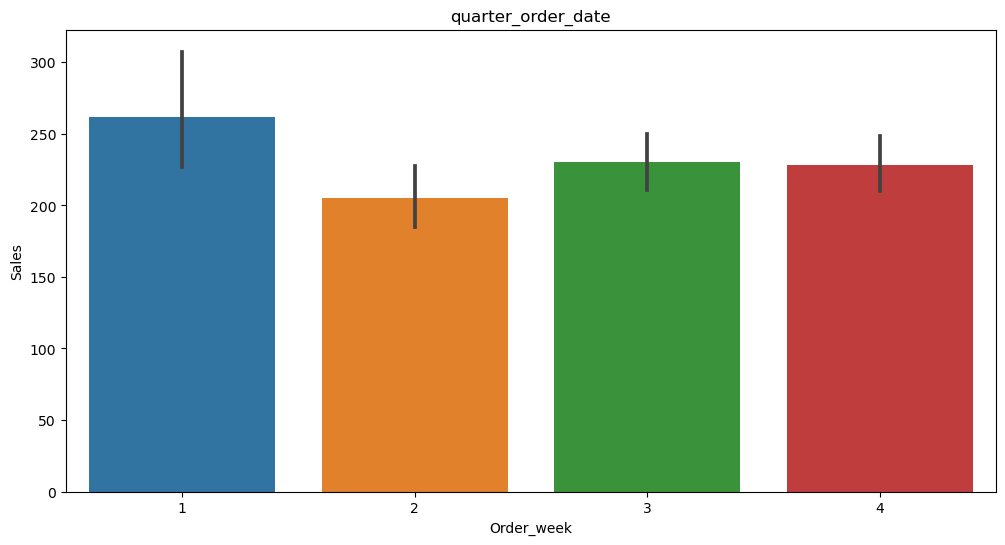

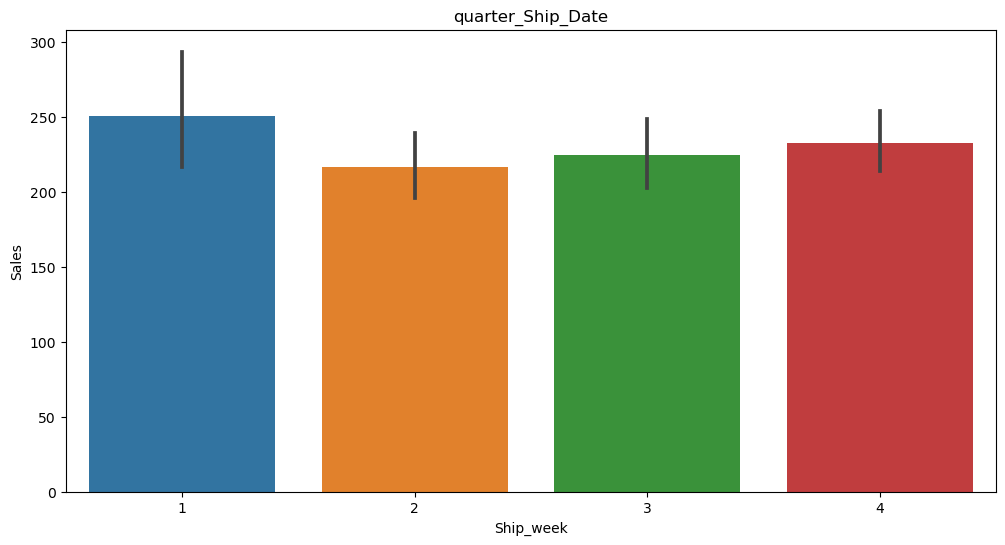

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='quarter_order_date',y='Sales', data=df)
plt.title("quarter_order_date")
plt.xlabel("Order_week")
plt.ylabel("Sales")
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='quarter_Ship_Date',y='Sales', data=df)
plt.title("quarter_Ship_Date")
plt.xlabel("Ship_week")
plt.ylabel("Sales")
plt.show()

Top Selling Products

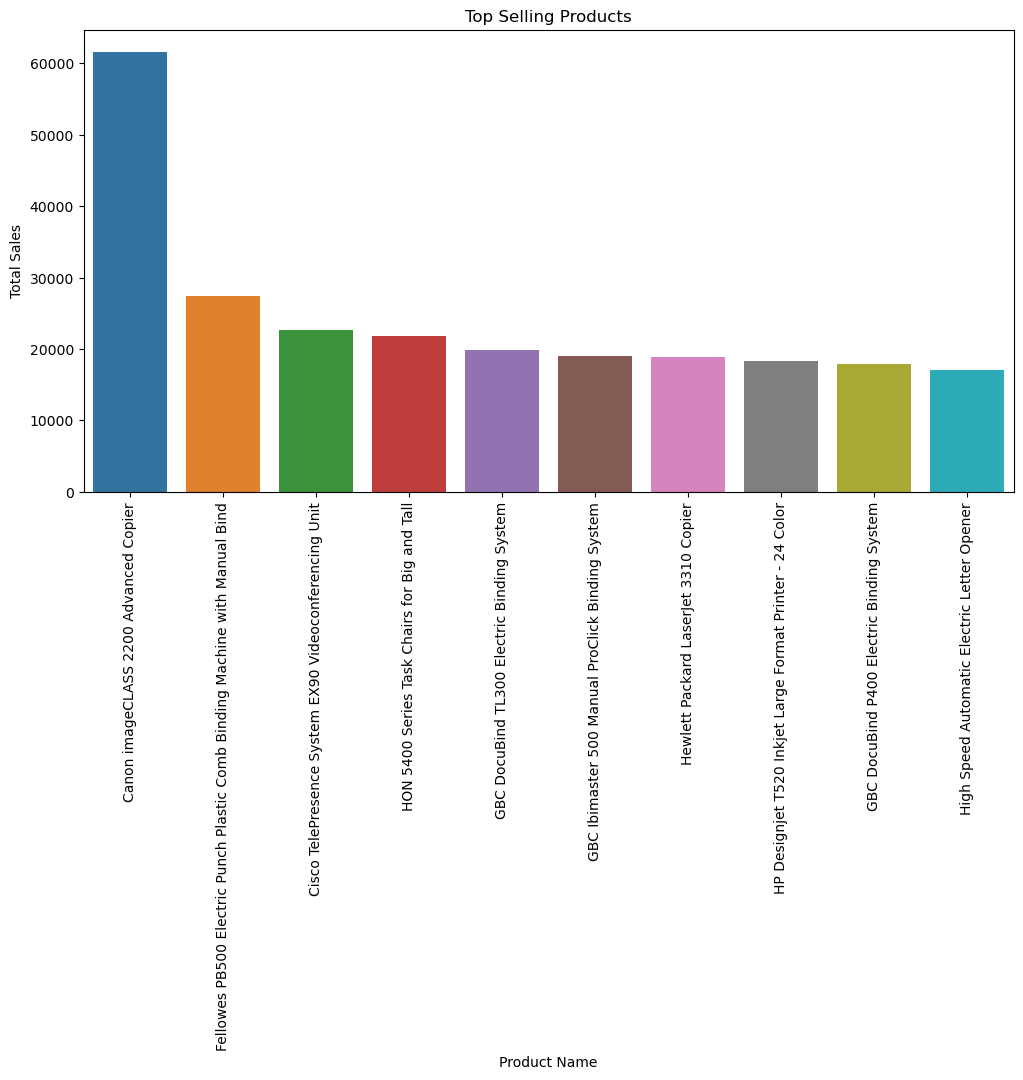

In [33]:
most_sold_products = df.groupby('Product_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_products.index, y=most_sold_products.values)
plt.xticks(rotation=90)
plt.title("Top Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

State Sales

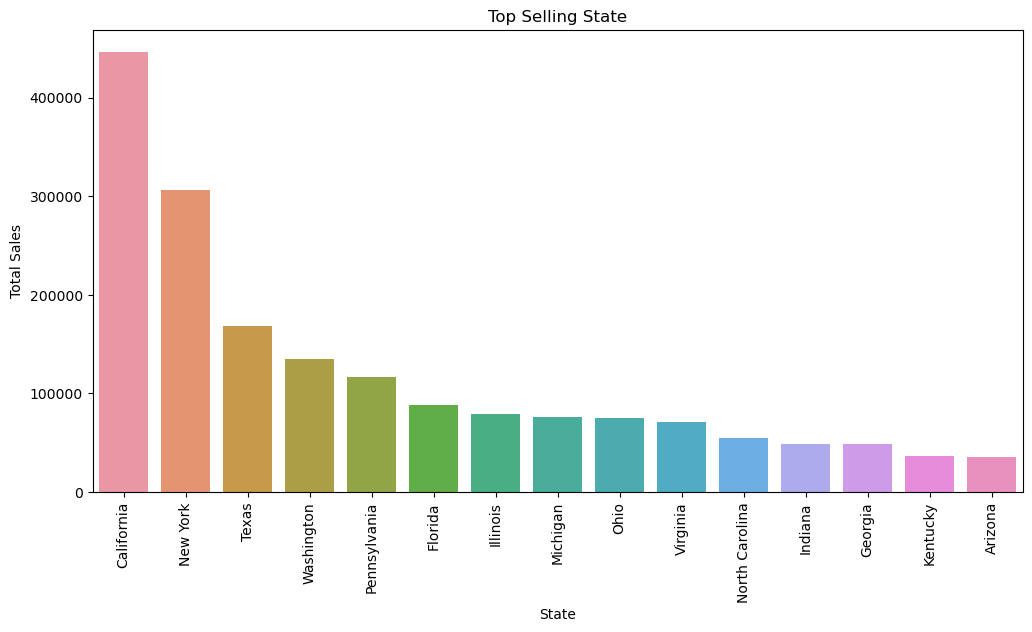

In [58]:
most_sold_State = df.groupby('State')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_State.index, y=most_sold_State.values)
plt.xticks(rotation=90)
plt.title("Top Selling State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

City sales

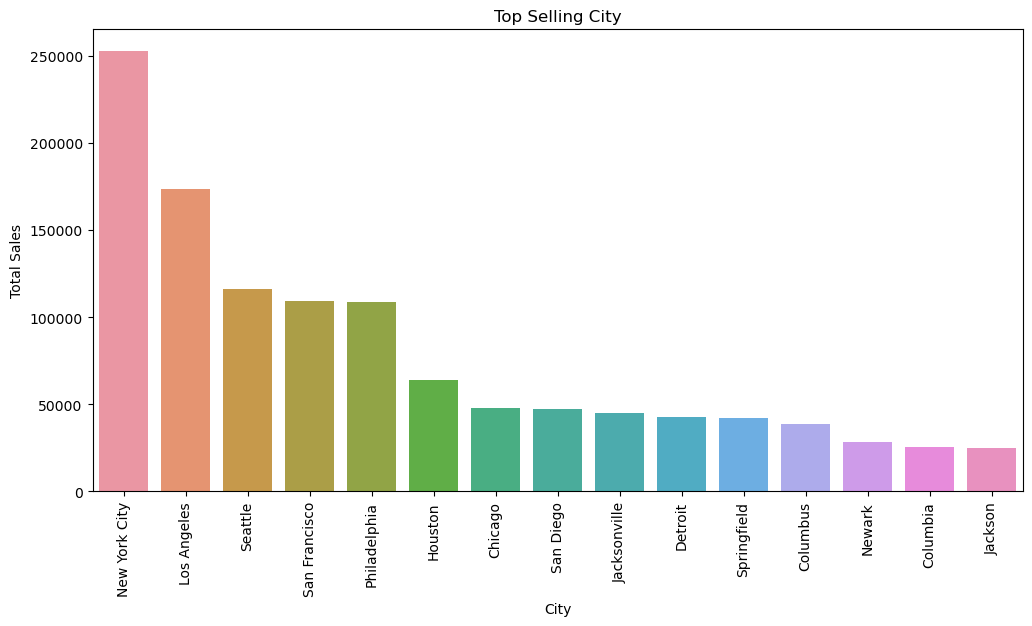

In [57]:
most_sold_City = df.groupby('City')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_City.index, y=most_sold_City.values)
plt.xticks(rotation=90)
plt.title("Top Selling City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

Region Sales

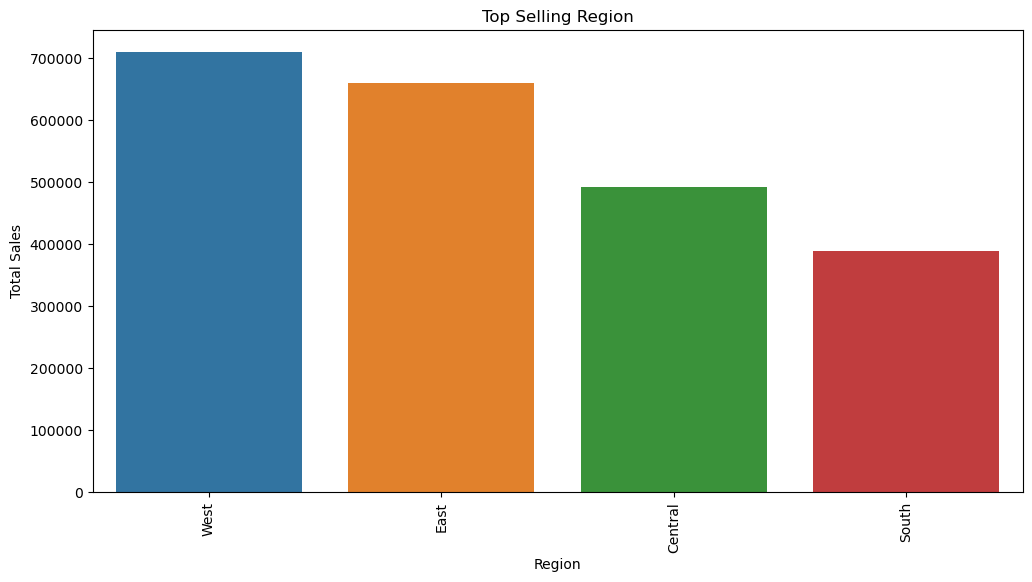

In [34]:
most_sold_in_Region = df.groupby('Region')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_in_Region.index, y=most_sold_in_Region.values)
plt.xticks(rotation=90)
plt.title("Top Selling Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

Category Sales

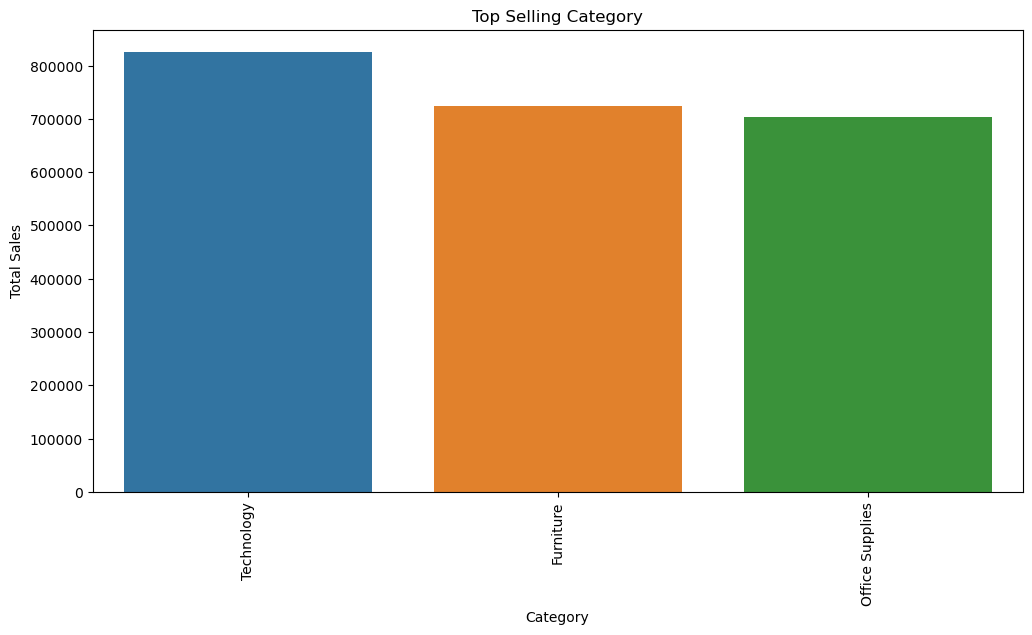

In [35]:
most_sold_Category = df.groupby('Category')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Category.index, y=most_sold_Category.values)
plt.xticks(rotation=90)
plt.title("Top Selling Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

Sub_category - Sales

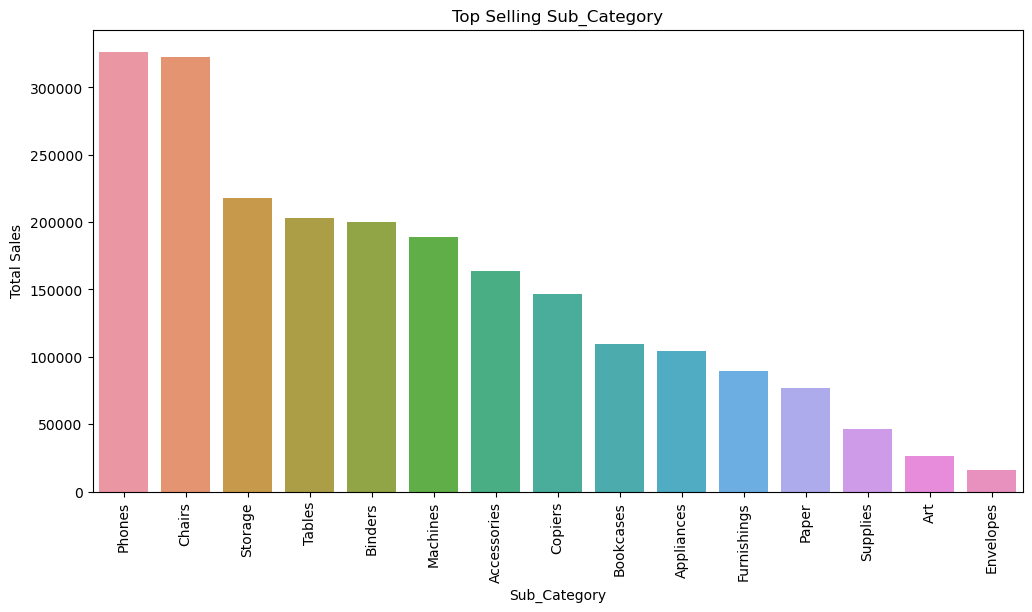

In [36]:
most_sold_Sub_Category = df.groupby('Sub_Category')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Sub_Category.index, y=most_sold_Sub_Category.values)
plt.xticks(rotation=90)
plt.title("Top Selling Sub_Category")
plt.xlabel("Sub_Category")
plt.ylabel("Total Sales")
plt.show()

Customer_id - Sales

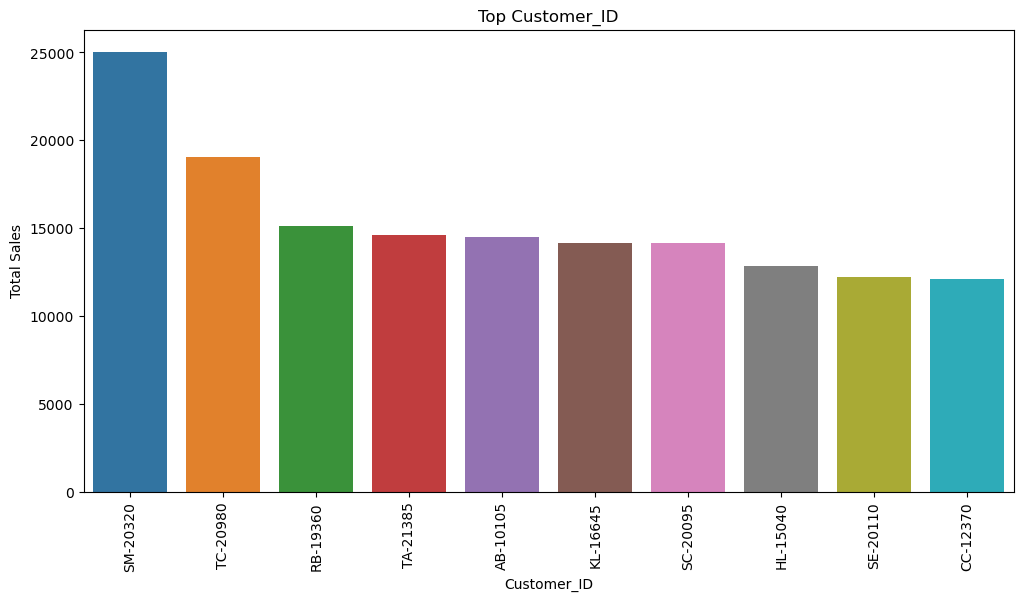

In [37]:
most_sold_Customer_ID = df.groupby('Customer_ID')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Customer_ID.index, y=most_sold_Customer_ID.values)
plt.xticks(rotation=90)
plt.title("Top Customer_ID")
plt.xlabel("Customer_ID")
plt.ylabel("Total Sales")
plt.show()

Region - Sales - year_order_date","month_order_date","day_of_week_order_date","day_of_year_order_date","weekday_date_order_date

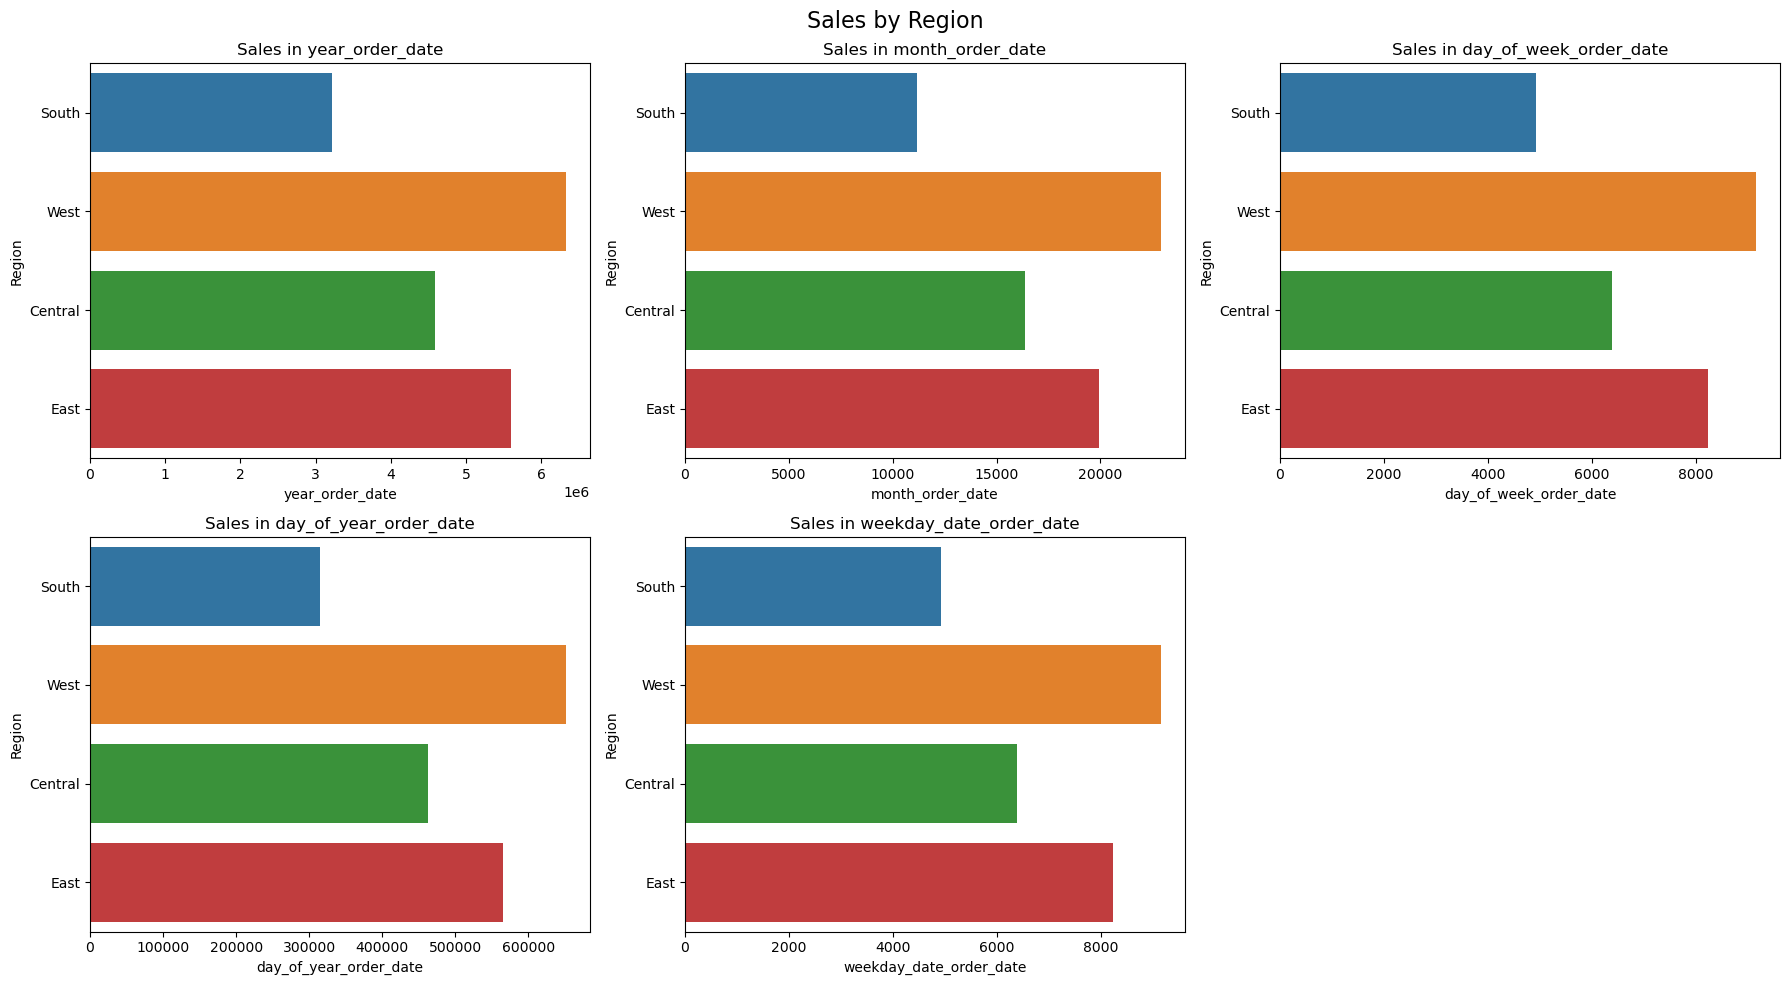

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
axes[-1].remove()

for index, Sales in enumerate(["year_order_date","month_order_date","day_of_week_order_date","day_of_year_order_date","weekday_date_order_date"]):
    sns.barplot(data= df, x=Sales,y="Region",
                estimator=sum,
                ci=None,
                ax=axes[index]).set_title("Sales in "+Sales.split("_Sales")[0])
   
plt.suptitle("Sales by Region", fontsize=16)
plt.tight_layout()
plt.show()

Region - sales - year_Ship_Date','month_Ship_Date', 'day_of_week_Ship_Date', 'day_of_year_Ship_Date','weekday_date_Ship_Date

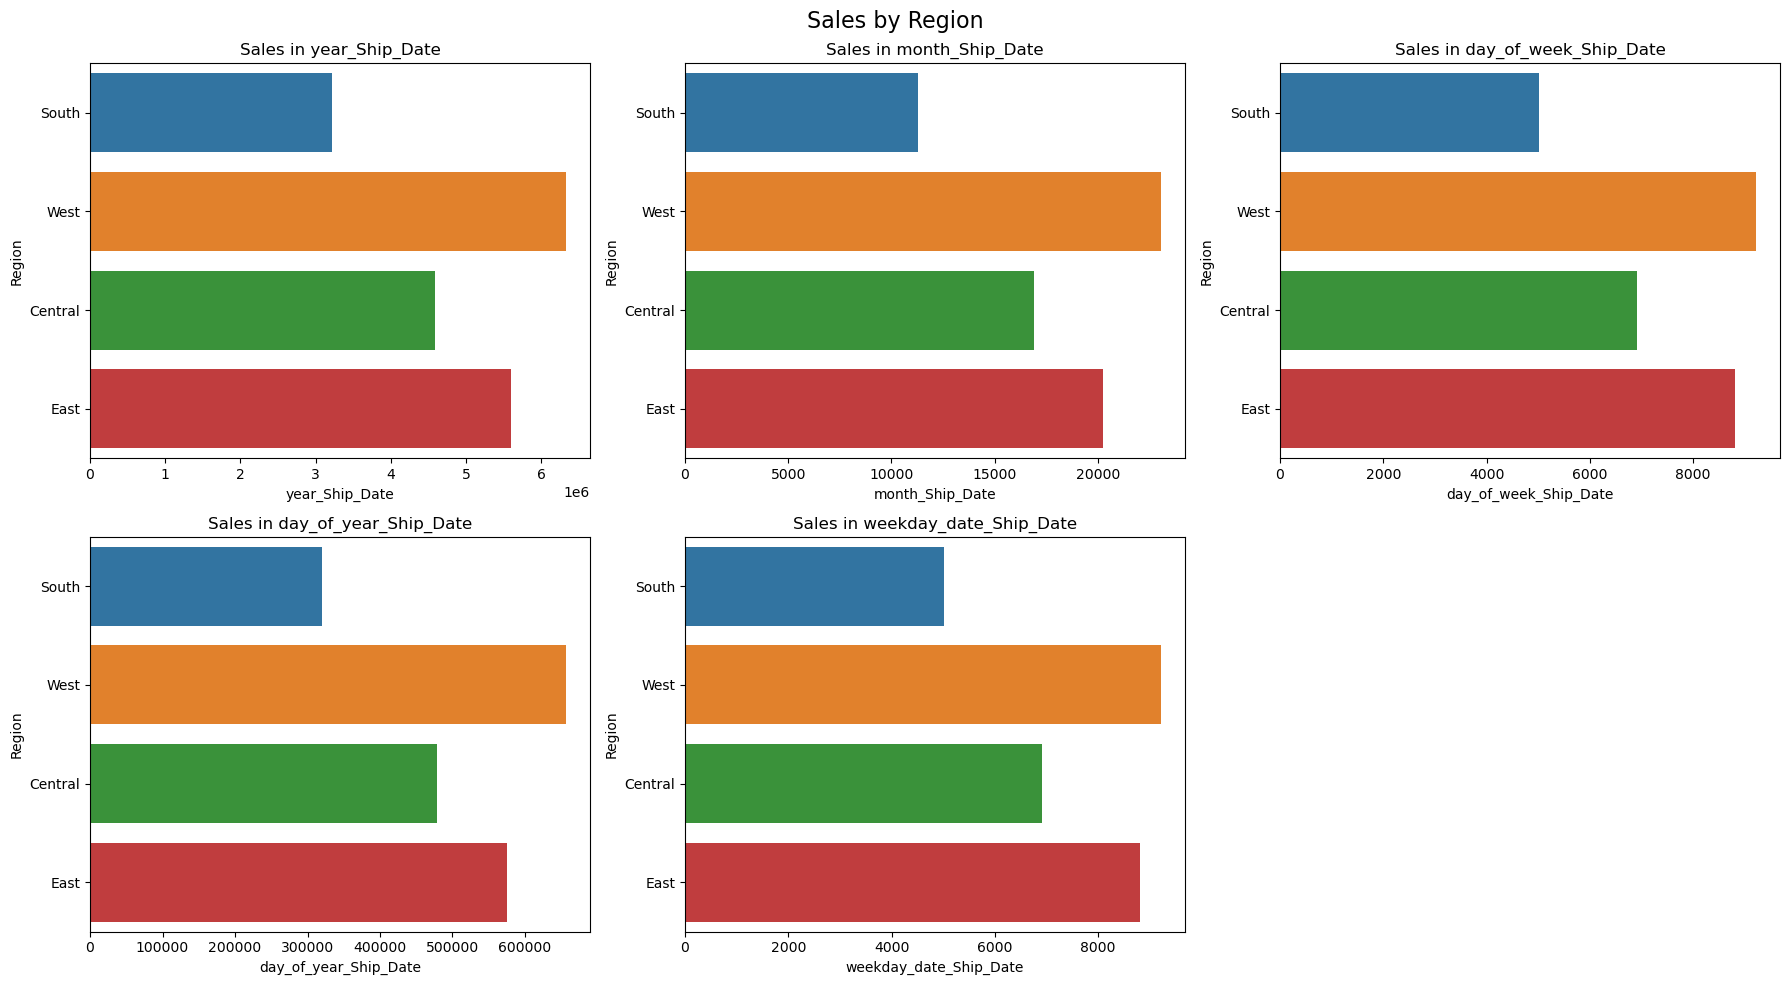

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
axes[-1].remove()

for index, Sales in enumerate(['year_Ship_Date','month_Ship_Date', 'day_of_week_Ship_Date', 'day_of_year_Ship_Date','weekday_date_Ship_Date']):
    sns.barplot(data= df, x=Sales,y="Region",
                estimator=sum,
                ci=None,
                ax=axes[index]).set_title("Sales in "+Sales.split("_Sales")[0])
   
plt.suptitle("Sales by Region", fontsize=16)
plt.tight_layout()
plt.show()

Ship_Mode -- Sales

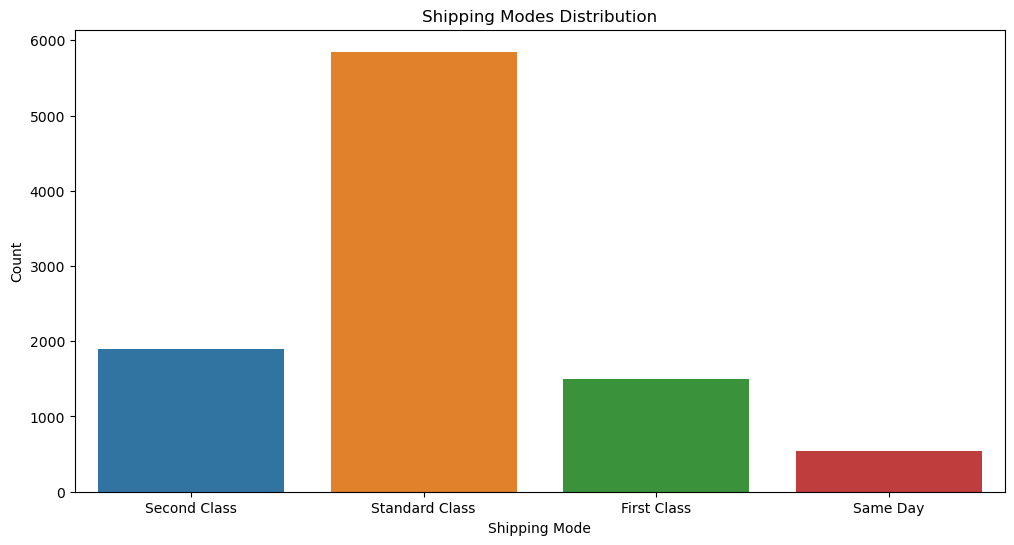

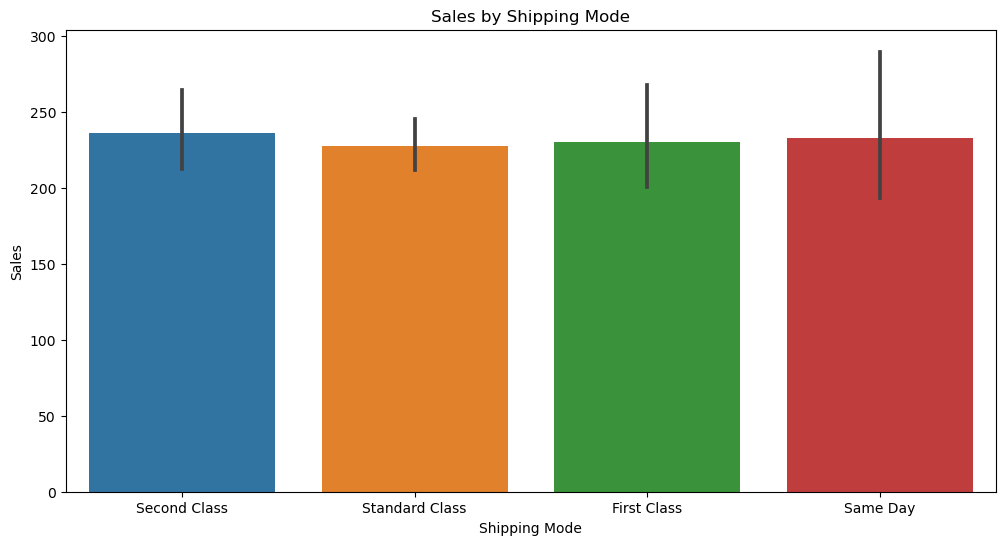

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Ship_Mode', data=df)
plt.title("Shipping Modes Distribution")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship_Mode', y='Sales', data=df)
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()


Segment -- Sales

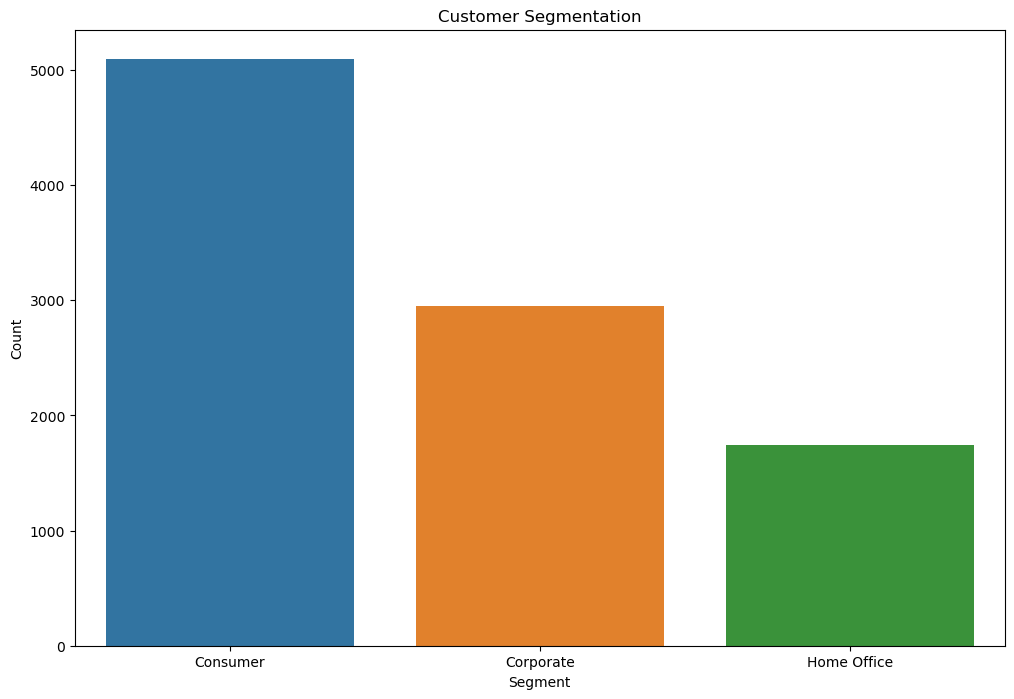

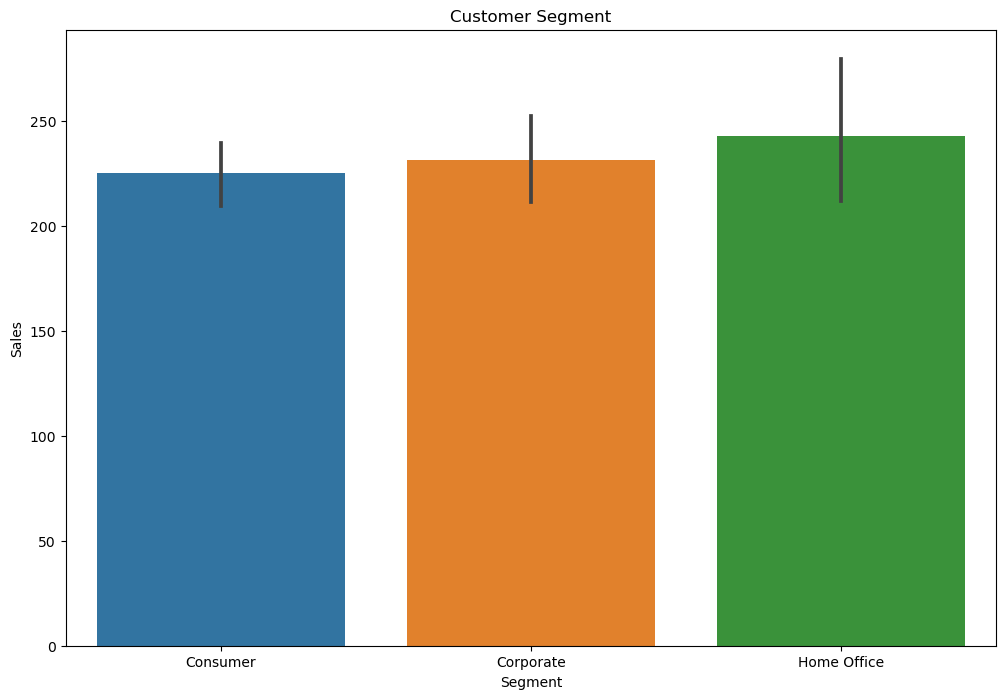

In [60]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Segment', data=df)
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Sales', data=df)
plt.title("Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

Monthly Trend

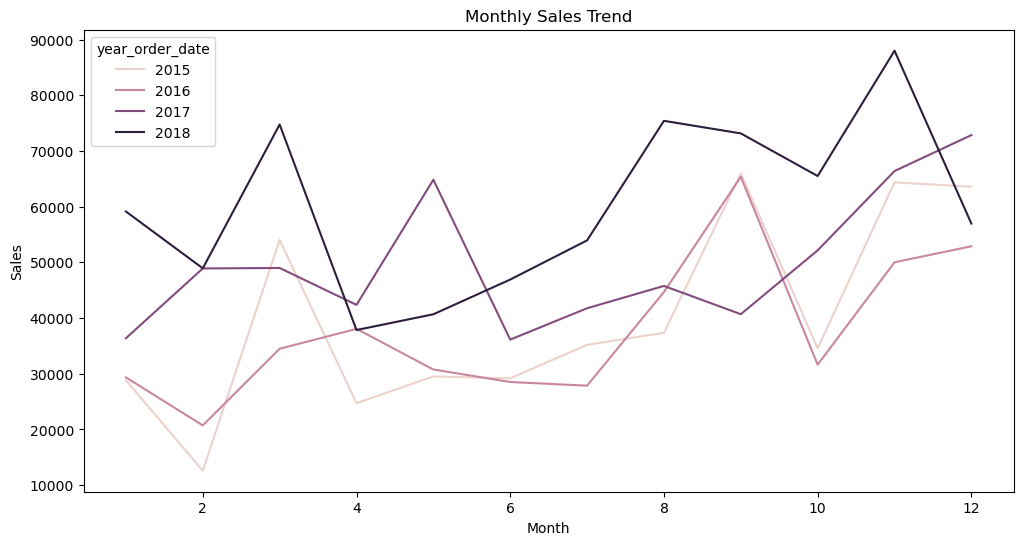

In [62]:

monthly_trend = df.groupby(['year_order_date', 'month_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_order_date', y='Sales', hue='year_order_date', data=monthly_trend)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

Day_of_week Trend

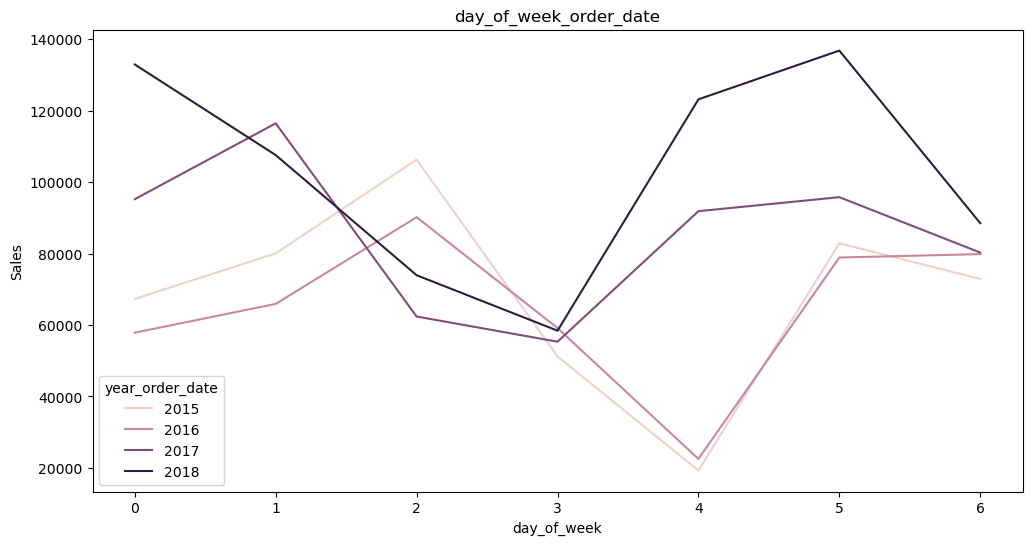

In [65]:
day_of_week_trend = df.groupby(['year_order_date', 'day_of_week_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_week_order_date', y='Sales', hue='year_order_date', data=day_of_week_trend)
plt.title("day_of_week_order_date")
plt.xlabel("day_of_week")
plt.ylabel("Sales")
plt.show()

Quarter_order_date trend

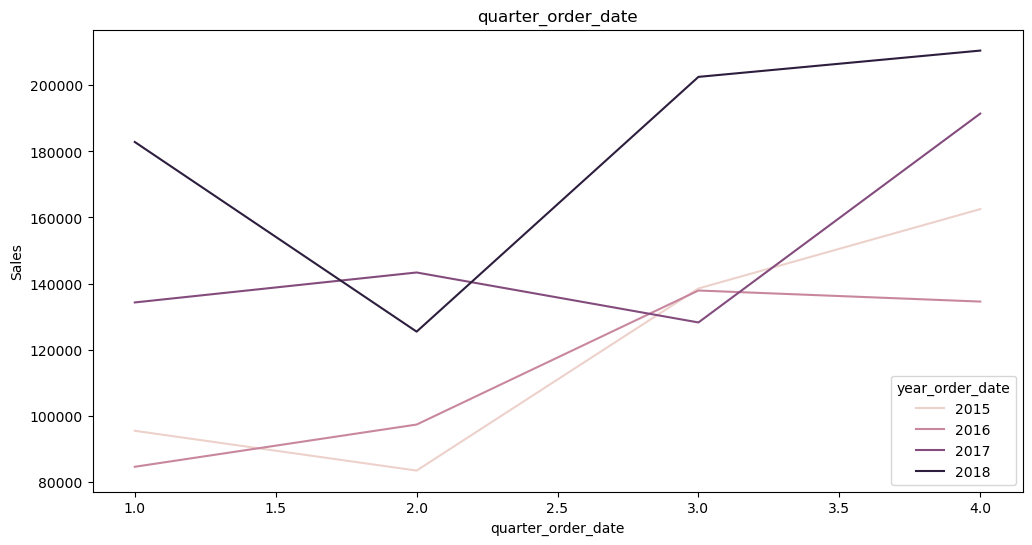

In [69]:
quarter_order_date = df.groupby(['year_order_date', 'quarter_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter_order_date', y='Sales', hue='year_order_date', data=quarter_order_date)
plt.title("quarter_order_date")
plt.xlabel("quarter_order_date")
plt.ylabel("Sales")
plt.show()

ANOVA_TEST

ANOVA Test Results:
F-statistic: 0.09097298566337089
P-value: 0.965036695995067
Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.


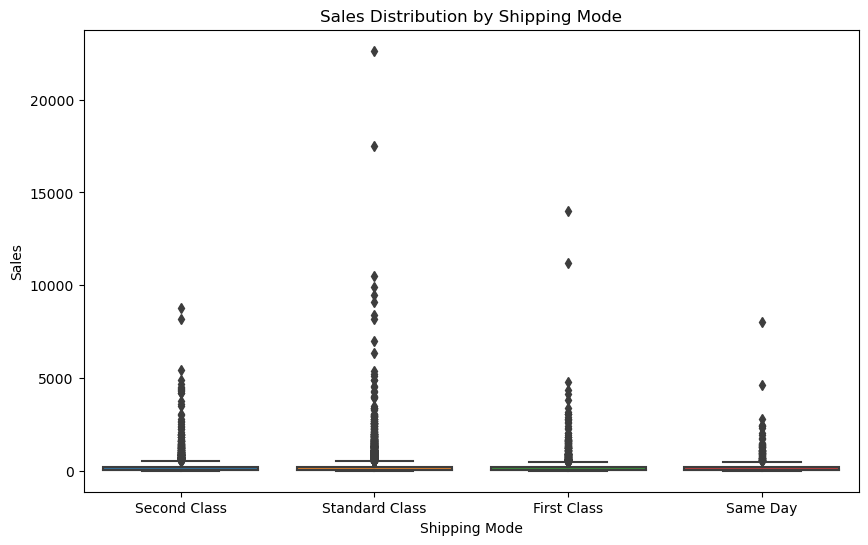

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
store = pd.read_csv('D:\\vscode\\Superstore_sales_analysis\\Superstore-Sales-Analysis\\superstore_final_dataset (1).csv',encoding= 'unicode_escape')

# Hypothesis Testing - ANOVA Test
shipping_modes = df['Ship_Mode'].unique()
grouped_data = [df[df['Ship_Mode'] == mode]['Sales'] for mode in shipping_modes]

# Perform ANOVA test
f_stat, p_value = f_oneway(*grouped_data)
alpha = 0.05

print("ANOVA Test Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Result: Reject Null Hypothesis - There are significant differences in average sales across different shipping modes.")
else:
    print("Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.")

# Post-hoc Analysis (Tukey's HSD Test) - Only if ANOVA test result is significant
if p_value < alpha:
    # Combine the data for Tukey's test
    data_for_tukey = pd.DataFrame({'data': df['Sales'], 'group': df['Ship_Mode']})

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(data_for_tukey['data'], data_for_tukey['group'])
    print("\nTukey's HSD Test Results:")
    print(tukey_result)

# Visualization of Sales by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship_Mode', y='Sales', data=df)
plt.title("Sales Distribution by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()

Machine Learning 

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Drop rows with missing values in the 'Sales' column
df = df.dropna(subset=['Sales'])

# Select features and target variable
X = df.drop(columns=['Sales'])
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Create a dictionary to store the models and their names
models = {
    'Linear Regression': linear_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model
}

results = {}

for name, model in models.items():
    # Create a pipeline with preprocessor and the current model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model on the training data
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate the model using MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the dictionary
    results[name] = {'MSE': mse, 'R-squared': r2}

# Convert the results to a DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

                             MSE  R-squared
Linear Regression  290481.099091   0.406132
Decision Tree      287155.985345   0.412929
Random Forest      198066.167841   0.595067


AUC ROC Score: 0.9385048499646426


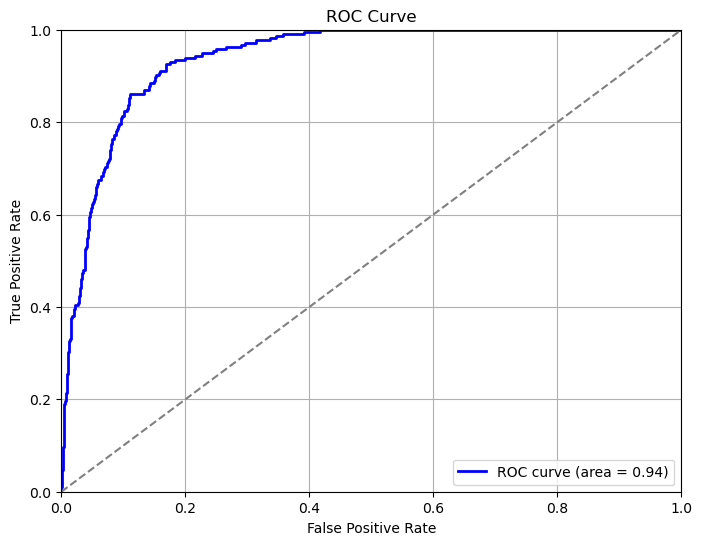

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
df = df.dropna(subset=['Sales'])

# Define the target variable (whether a product is of interest or not)
df['Product_of_Interest'] = df['Sales'] > 500

# Select features and target variable
X = df.drop(columns=['Sales', 'Product_of_Interest'])
y = df['Product_of_Interest']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a logistic regression model with an increased number of iterations and 'saga' solver
logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Create a pipeline with preprocessor and the logistic regression model
logistic_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])

# Fit the logistic regression model on the training data
logistic_model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = logistic_model_pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Score:", auc_roc)

# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Logistic Regression - AUC ROC Score: 0.9384568173024324
Random Forest - AUC ROC Score: 0.9353373627399965
SVM - AUC ROC Score: 0.888767028245874


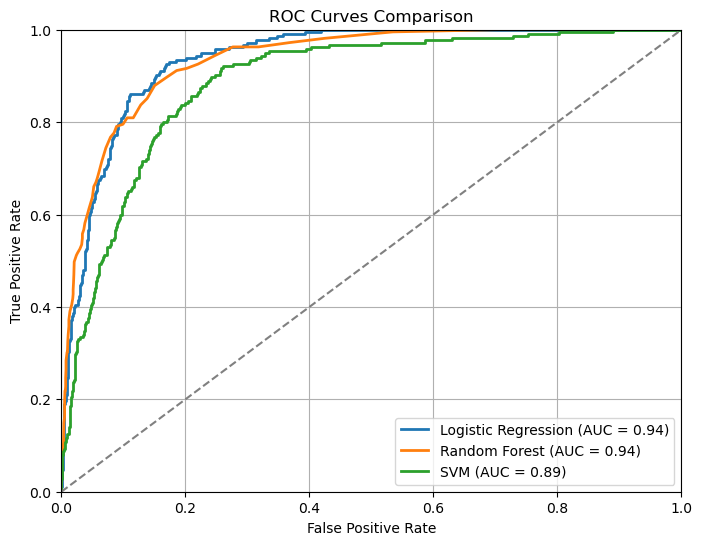

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
df = df.dropna(subset=['Sales'])

# Define the target variable (whether a product is of interest or not)
df['Product_of_Interest'] = df['Sales'] > 500

# Select features and target variable
X = df.drop(columns=['Sales', 'Product_of_Interest'])
y = df['Product_of_Interest']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]

# Fit and evaluate models
results = []
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results.append((name, auc_roc))

# Print results
for name, auc_roc in results:
    print(f"{name} - AUC ROC Score: {auc_roc}")

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_roc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [75]:
#THANK YOU